## Dataset link:
https://www.kaggle.com/competitions/aptos2019-blindness-detection/overview

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from glob import glob
import os, cv2, shutil
from zipfile import ZipFile
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.utils import np_utils, to_categorical
from tensorflow.keras.preprocessing.image import img_to_array

In [2]:
dataset = []
labels  = []

In [3]:
def prepare_Images(label , path):
    img=cv2.imread(path,cv2.IMREAD_COLOR)
    img_res=cv2.resize(img,(200,200))/255
    img_array = img_to_array(img_res)
    dataset.append(img_array)
    labels.append(str(label))

In [5]:
user_folder = os.path.expanduser('~')
data_folder = os.path.join(user_folder, 'Desktop', 'Course_files')
train_Data = pd.read_csv(os.path.join(data_folder, 'train.csv'))
train_Data.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [6]:
id_code_Data   = train_Data['id_code']
diagnosis_Data = train_Data['diagnosis']

In [7]:
for id_code,diagnosis in tqdm(zip(id_code_Data, diagnosis_Data)):
    path = os.path.join(data_folder, 'train_images','{}.png'.format(id_code))
    prepare_Images(diagnosis,path)

3662it [05:45, 10.61it/s]


In [8]:
images = np.array(dataset)
label_arr = np.array(labels)

In [9]:
images.shape, label_arr.shape

((3662, 200, 200, 3), (3662,))

In [10]:
unique, counts = np.unique(label_arr, return_counts=True)

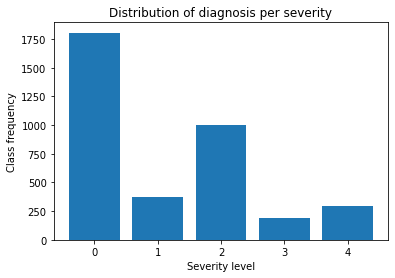

In [11]:
plt.bar(unique, counts)
plt.title('Distribution of diagnosis per severity')
plt.xlabel('Severity level')
plt.ylabel('Class frequency')
plt.show()

In [11]:
X_total, Y_total = shuffle(images, label_arr)

In [12]:
train_labels = to_categorical(label_arr, num_classes = 5, dtype ="uint8") 

In [13]:
train_labels

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [14]:
label_arr

array(['2', '4', '1', ..., '2', '0', '2'], dtype='<U1')